In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import pickle
import time

# Load d·ªØ li·ªáu

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/ML/Final_Project/2. data_clean/final_data.xlsx")
data

Rate                                             Review  Label  \
0        4  M√¨nh th·ªÅ l√† m√¨nh ko th·ªÉ c·∫£m n·ªïi ƒë·ªì ƒÉn ·ªü aeon m...     -1   
1      3.8  ƒê√¥i khi th√®m l√™n l√† b·∫•t ch·∫•p n·∫Øng n√≥ng phi V√† ...     -1   
2      3.8  Ng√µ treo bi·ªÉn cafe tr·ª©ng ƒë√∫ng ki·ªÉu ph·ªë c·ªï h√† n...     -1   
3      3.8  M√¨nh th·∫•y ƒë·ªãa ch·ªâ cafe Gi·∫£ng ·ªü Nguy·ªÖn H·ªØu Hu√¢n...     -1   
4      2.2  M√¨nh l√† ng∆∞·ªùi H√† N·ªôi v√† c≈©ng c·ª±c k·ª≥ kh√≥ t√≠nh t...     -1   
...    ...                                                ...    ...   
11122  9.0  M√¨nh l√† kh√°ch h√†ng th∆∞·ªùng xuy√™n c·ªßa qu√°n, c√≥ t...      1   
11123  7.2  M√¨nh m·ªõi ƒë·∫øn qu√°n 1 l·∫ßn v√† c·∫£m th·∫•y qu√°n kh√° d...      1   
11124  8.0  Qu√°n ƒÉn ƒë·ªì H√†n m·ªõi m·ªü ·ªü g·∫ßn tr∆∞·ªùng m√¨nh n√™n b·ªØ...      1   
11125   10  Tr√† S·ªØa D∆∞a L∆∞·ªõi y nh∆∞ gu m√¨nh th√≠ch :))) Tuy ...      1   
11126  6.8  Fan cu√¥ÃÄng miÃÄ cay ∆°Ãâ ƒë√¢y,miÃÄ boÃÄ kim chi c∆∞Ã£c...      1   

                                       Preprocess_Review  
0      th·ªÅ kh√¥ng th·ªÉ c·∫£m n·ªïi ƒë·ªì ƒÉn aeon mall ƒÉn food ...  
1      ƒë√¥i th√®m b·∫•t_ch·∫•p n·∫Øng n√≥ng phi ƒë√≥ng_ƒë√¥ qu·∫ßy f...  
2      ng√µ treo bi·ªÉn cafe tr·ª©ng ph·ªë c·ªï h√†_n·ªôi s√¢u nh·ªè...  
3      ƒë·ªãa_ch·ªâ cafe gi·∫£ng nguy·ªÖn_h·ªØu_hu√¢n ngon h·ªìi c√≤...  
4      h√†_n·ªôi c·ª±c_k·ª≥ kh√≥_t√≠nh ƒÉn ph·ªë g·∫ßn cafe c≈© gi·∫£n...  
...                                                  ...  
11122  kh√°ch_h√†ng th∆∞·ªùng_xuy√™n tu·∫ßn ƒÉn th√≠ch nh·∫•t s√∫p...  
11123  kh√° d·ªÖ t√¨m th√¢n_thi·ªán ƒë·ªì ƒÉn_theo phong_c√°ch h√†...  
11124  ƒÉn ƒë·ªì h√†n g·∫ßn tr∆∞·ªùng n√™n b·ªØa th√®m qu√° n√™n qu·∫•t...  
11125  d∆∞a l∆∞·ªõi y_nh∆∞ gu th√≠ch tuy v·∫´n d∆∞a l∆∞·ªõi nh∆∞ng...  
11126  fan cu·ªìng m√¨ cay m√¨ kim_chi c·ª±c ngon m√°y_l·∫°nh ...  

[11127 rows x 4 columns]

In [ ]:
data.isna().sum()

Rate                 0
Review               0
Label                0
Preprocess_Review    0
dtype: int64

# X√¢y d·ª±ng m√¥ h√¨nh ph√¢n l·ªõp

In [ ]:
# Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# M√¥ h√¨nh ph√¢n l·ªõp
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model selection
from sklearn.model_selection import train_test_split

# ƒê√°nh gi√°
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
reviews = data["Preprocess_Review"]
labels = data["Label"]

In [ ]:
labels.value_counts()

 1    6677
-1    3268
 0    1182
Name: Label, dtype: int64

## 1. Train, test splitting

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(reviews, labels, test_size=0.2, random_state=42, stratify=labels)

In [ ]:
train_y.value_counts()

 1    5341
-1    2614
 0     946
Name: Label, dtype: int64

In [ ]:
test_y.value_counts()

 1    1336
-1     654
 0     236
Name: Label, dtype: int64

## 2. WordCloud cho t·ª´ng l·ªõp

In [ ]:
from wordcloud import WordCloud

In [ ]:
np_train_x = np.array(train_x)
np_train_y = np.array(train_y)

### 2.1. T√≠ch c·ª±c

In [ ]:
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=1000,
                      min_font_size=20).generate(str(np_train_x[np.where(np_train_y == 1)]))

fig = plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 2.2. Trung l·∫≠p

In [ ]:
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=1000,
                      min_font_size=20).generate(str(np_train_x[np.where(np_train_y == 0)]))

fig = plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 2.3. Ti√™u c·ª±c

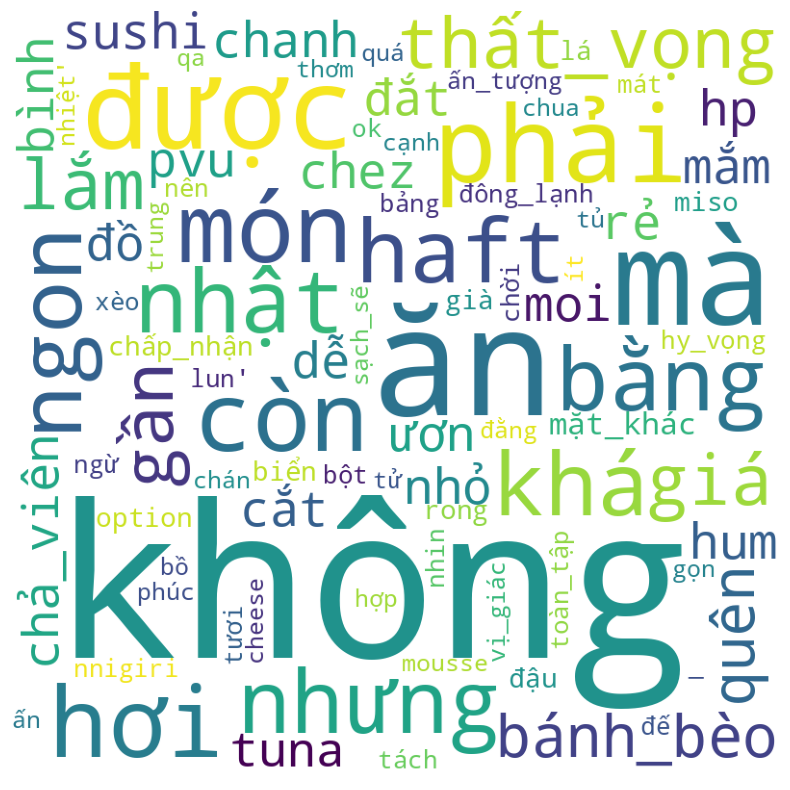

In [ ]:
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=1000,
                      min_font_size=20).generate(str(np_train_x[np.where(np_train_y == -1)]))

fig = plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 3. Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng

In [ ]:
# T·∫°o ƒë·ªëi t∆∞·ª£ng TfidfVectorizer
tfidf = TfidfVectorizer()

# Bi·∫øn ƒë·ªïi t·∫≠p hu·∫•n luy·ªán th√†nh ma tr·∫≠n TF-IDF
train_x_tfidf = tfidf.fit_transform(train_x)

# Bi·∫øn ƒë·ªïi t·∫≠p ki·ªÉm tra th√†nh ma tr·∫≠n TF-IDF
test_x_tfidf = tfidf.transform(test_x)

## 3. Hu·∫•n luy·ªán m√¥ h√¨nh Machine Learning

In [ ]:
def display_result(model):
  print(classification_report(test_y, pred_y))
  plt.figure(figsize=(5, 3))
  conf_matrix = confusion_matrix(test_y, pred_y, labels=labels.unique())
  sb.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlOrRd')

### 3.1. KNN

In [ ]:
knn = KNeighborsClassifier()
start = time.time()
knn.fit(train_x_tfidf, train_y)
print('KNN training time: %d' %(time.time() - start))

KNN training time: 0


In [ ]:
start = time.time()
pred_y = knn.predict(test_x_tfidf)
print('KNN testing time: %d' %(time.time() - start))

KNN testing time: 16


              precision    recall  f1-score   support

          -1       0.74      0.46      0.56       654
           0       0.14      0.04      0.07       236
           1       0.71      0.93      0.81      1336

    accuracy                           0.70      2226
   macro avg       0.53      0.48      0.48      2226
weighted avg       0.66      0.70      0.66      2226



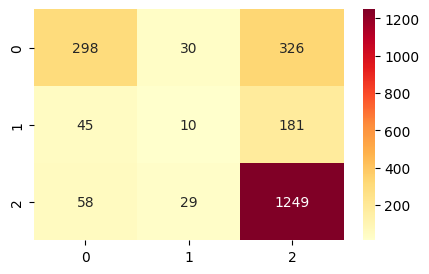

In [ ]:
display_result(knn)

### 3.2. Multinomial Naive Bayes

In [ ]:
mnb = MultinomialNB()
start = time.time()
mnb.fit(train_x_tfidf, train_y)
print('Multinomial Naive Bayes training time: %d' %(time.time() - start))

Multinomial Naive Bayes training time: 0


In [ ]:
start = time.time()
pred_y = mnb.predict(test_x_tfidf)
print('Multinomial Naive Bayes testing time: %d' %(time.time() - start))

Multinomial Naive Bayes testing time: 0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.90      0.46      0.61       654
           0       0.00      0.00      0.00       236
           1       0.70      0.99      0.82      1336

    accuracy                           0.73      2226
   macro avg       0.53      0.49      0.48      2226
weighted avg       0.69      0.73      0.67      2226



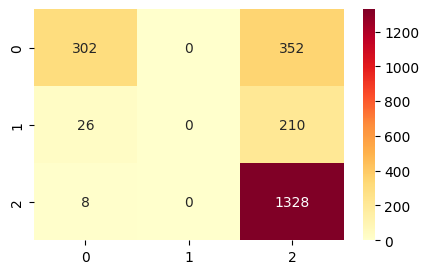

In [ ]:
display_result(mnb)

### 3.3. Logistic Regression

In [ ]:
lgres = LogisticRegression()
start = time.time()
lgres.fit(train_x_tfidf, train_y)
print('Logistic training time: %d' %(time.time() - start))

Logistic training time: 1


In [ ]:
start = time.time()
pred_y = lgres.predict(test_x_tfidf)
print('Logistic regression testing time: %d' %(time.time() - start))

Logistic regression testing time: 0


              precision    recall  f1-score   support

          -1       0.79      0.79      0.79       654
           0       0.43      0.11      0.17       236
           1       0.83      0.95      0.89      1336

    accuracy                           0.81      2226
   macro avg       0.69      0.61      0.62      2226
weighted avg       0.78      0.81      0.78      2226



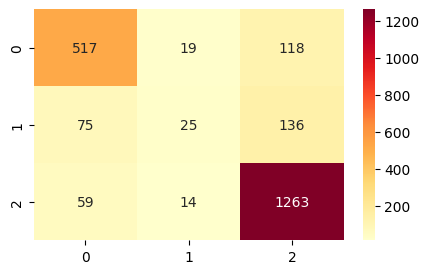

In [ ]:
display_result(lgres)

### 3.4. SVM

In [ ]:
svm = SVC(random_state=42)
start = time.time()
svm.fit(train_x_tfidf, train_y)
print('SVM training time: %d' %(time.time() - start))

SVM training time: 31


In [ ]:
start = time.time()
pred_y = svm.predict(test_x_tfidf)
print('SVM testing time: %d' %(time.time() - start))

SVM testing time: 5


              precision    recall  f1-score   support

          -1       0.80      0.79      0.80       654
           0       0.33      0.02      0.04       236
           1       0.82      0.96      0.88      1336

    accuracy                           0.81      2226
   macro avg       0.65      0.59      0.57      2226
weighted avg       0.76      0.81      0.77      2226



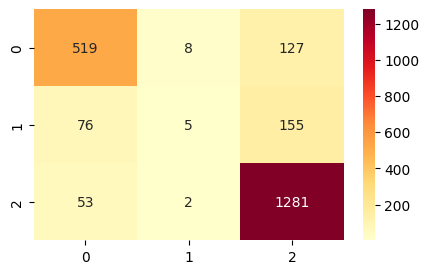

In [ ]:
display_result(svm)

### 3.4. Decision Tree

In [ ]:
tree = DecisionTreeClassifier(random_state=42)
start = time.time()
tree.fit(train_x_tfidf, train_y)
print('Decision Tree training time: %d' %(time.time() - start))

Decision Tree training time: 4


In [ ]:
start = time.time()
pred_y = tree.predict(test_x_tfidf)
print('Decision Tree testing time: %d' %(time.time() - start))

Decision Tree testing time: 0


              precision    recall  f1-score   support

          -1       0.62      0.61      0.62       654
           0       0.17      0.15      0.16       236
           1       0.80      0.82      0.81      1336

    accuracy                           0.69      2226
   macro avg       0.53      0.53      0.53      2226
weighted avg       0.68      0.69      0.68      2226



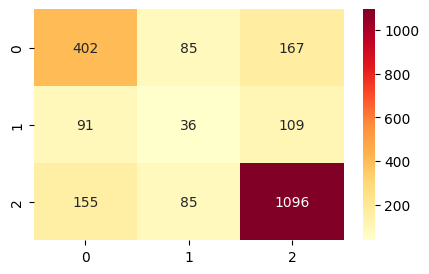

In [ ]:
display_result(tree)

### 3.5. Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
start = time.time()
rf.fit(train_x_tfidf, train_y)
print('rf training time: %d' %(time.time() - start))

rf training time: 20


In [ ]:
start = time.time()
pred_y = rf.predict(test_x_tfidf)
print('Random Forest testing time: %d' %(time.time() - start))

Random Forest testing time: 0


              precision    recall  f1-score   support

          -1       0.80      0.74      0.77       654
           0       0.33      0.01      0.02       236
           1       0.79      0.96      0.87      1336

    accuracy                           0.79      2226
   macro avg       0.64      0.57      0.55      2226
weighted avg       0.75      0.79      0.75      2226



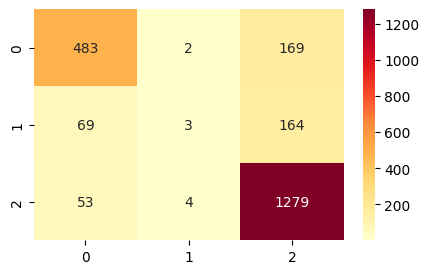

In [ ]:
display_result(rf)

# Tinh ch·ªânh si√™u tham s·ªë

## 1. GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define parameter grid
param_grid = {'C': np.arange(0.25,7.5,0.25),
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              }

# Define grid search
grid_search = GridSearchCV(lgres, param_grid, cv=5, n_jobs=-1)

# Train the model with grid search
start = time.time()
grid_search.fit(train_x_tfidf, train_y)
print('Searching time:', (time.time() - start))

# Print the best parameters
print('Best parameters:', grid_search.best_params_)

Searching time: 267.88181018829346
Best parameters: {'C': 1.5, 'solver': 'saga'}


## 2. Best model

In [ ]:
best_model = LogisticRegression(C= 1.5, solver='saga')
start = time.time()
best_model.fit(train_x_tfidf, train_y)
print('Logistic training time: %d' %(time.time() - start))

Logistic training time: 0


In [ ]:
start = time.time()
pred_y = best_model.predict(test_x_tfidf)
print('Best model testing time: %d' %(time.time() - start))

Best model testing time: 0


              precision    recall  f1-score   support

          -1       0.79      0.79      0.79       654
           0       0.43      0.13      0.20       236
           1       0.84      0.94      0.88      1336

    accuracy                           0.81      2226
   macro avg       0.69      0.62      0.62      2226
weighted avg       0.78      0.81      0.78      2226



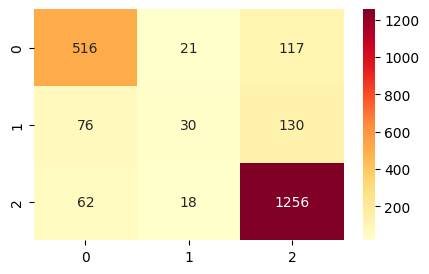

In [ ]:
display_result(best_model)

# Th·ª≠ nghi·ªám

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import math

## 1. Ti·ªÅn x·ª≠ l√≠

In [ ]:
import regex as re

In [ ]:
!pip install underthesea

### 1. X√≥a HTML tag

In [ ]:
def remove_html(text):
  return re.sub(r'<[^>]*>', '', text)

print(remove_html("<h1>Title</h1>"))

Title


### 2. Chu·∫©n h√≥a Unicode v√† d·∫•u c√¢u

In [ ]:
from underthesea import text_normalize

uniChars = "√†√°·∫£√£·∫°√¢·∫ß·∫•·∫©·∫´·∫≠ƒÉ·∫±·∫Ø·∫≥·∫µ·∫∑√®√©·∫ª·∫Ω·∫π√™·ªÅ·∫ø·ªÉ·ªÖ·ªáƒë√¨√≠·ªâƒ©·ªã√≤√≥·ªè√µ·ªç√¥·ªì·ªë·ªï·ªó·ªô∆°·ªù·ªõ·ªü·ª°·ª£√π√∫·ªß≈©·ª•∆∞·ª´·ª©·ª≠·ªØ·ª±·ª≥√Ω·ª∑·ªπ·ªµ√Ä√Å·∫¢√É·∫†√Ç·∫¶·∫§·∫®·∫™·∫¨ƒÇ·∫∞·∫Æ·∫≤·∫¥·∫∂√à√â·∫∫·∫º·∫∏√ä·ªÄ·∫æ·ªÇ·ªÑ·ªÜƒê√å√ç·ªàƒ®·ªä√í√ì·ªé√ï·ªå√î·ªí·ªê·ªî·ªñ·ªò∆†·ªú·ªö·ªû·ª†·ª¢√ô√ö·ª¶≈®·ª§∆Ø·ª™·ª®·ª¨·ªÆ·ª∞·ª≤√ù·ª∂·ª∏·ª¥√ÇƒÇƒê√î∆†∆Ø"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

# H√†m t·∫°o dict ƒë·ªÉ convert ƒë·ªãnh d·∫°ng c≈© sang ƒë·ªãnh d·∫°ng m·ªõi
def loaddicchar():
  dic = {}
  char1252 = 'aÃÄ|aÃÅ|aÃâ|aÃÉ|aÃ£|√¢ÃÄ|√¢ÃÅ|√¢Ãâ|√¢ÃÉ|√¢Ã£|ƒÉÃÄ|ƒÉÃÅ|ƒÉÃâ|ƒÉÃÉ|ƒÉÃ£|eÃÄ|eÃÅ|eÃâ|eÃÉ|eÃ£|√™ÃÄ|√™ÃÅ|√™Ãâ|√™ÃÉ|√™Ã£|iÃÄ|iÃÅ|iÃâ|iÃÉ|iÃ£|oÃÄ|oÃÅ|oÃâ|oÃÉ|oÃ£|√¥ÃÄ|√¥ÃÅ|√¥Ãâ|√¥ÃÉ|√¥Ã£|∆°ÃÄ|∆°ÃÅ|∆°Ãâ|∆°ÃÉ|∆°Ã£|uÃÄ|uÃÅ|uÃâ|uÃÉ|uÃ£|∆∞ÃÄ|∆∞ÃÅ|∆∞Ãâ|∆∞ÃÉ|∆∞Ã£|yÃÄ|yÃÅ|yÃâ|yÃÉ|yÃ£|AÃÄ|AÃÅ|AÃâ|AÃÉ|AÃ£|√ÇÃÄ|√ÇÃÅ|√ÇÃâ|√ÇÃÉ|√ÇÃ£|ƒÇÃÄ|ƒÇÃÅ|ƒÇÃâ|ƒÇÃÉ|ƒÇÃ£|EÃÄ|EÃÅ|EÃâ|EÃÉ|EÃ£|√äÃÄ|√äÃÅ|√äÃâ|√äÃÉ|√äÃ£|IÃÄ|IÃÅ|IÃâ|IÃÉ|IÃ£|OÃÄ|OÃÅ|OÃâ|OÃÉ|OÃ£|√îÃÄ|√îÃÅ|√îÃâ|√îÃÉ|√îÃ£|∆†ÃÄ|∆†ÃÅ|∆†Ãâ|∆†ÃÉ|∆†Ã£|UÃÄ|UÃÅ|UÃâ|UÃÉ|UÃ£|∆ØÃÄ|∆ØÃÅ|∆ØÃâ|∆ØÃÉ|∆ØÃ£|YÃÄ|YÃÅ|YÃâ|YÃÉ|YÃ£'.split('|')
  charutf8 = "√†|√°|·∫£|√£|·∫°|·∫ß|·∫•|·∫©|·∫´|·∫≠|·∫±|·∫Ø|·∫≥|·∫µ|·∫∑|√®|√©|·∫ª|·∫Ω|·∫π|·ªÅ|·∫ø|·ªÉ|·ªÖ|·ªá|√¨|√≠|·ªâ|ƒ©|·ªã|√≤|√≥|·ªè|√µ|·ªç|·ªì|·ªë|·ªï|·ªó|·ªô|·ªù|·ªõ|·ªü|·ª°|·ª£|√π|√∫|·ªß|≈©|·ª•|·ª´|·ª©|·ª≠|·ªØ|·ª±|·ª≥|√Ω|·ª∑|·ªπ|·ªµ|√Ä|√Å|·∫¢|√É|·∫†|·∫¶|·∫§|·∫®|·∫™|·∫¨|·∫∞|·∫Æ|·∫≤|·∫¥|·∫∂|√à|√â|·∫∫|·∫º|·∫∏|·ªÄ|·∫æ|·ªÇ|·ªÑ|·ªÜ|√å|√ç|·ªà|ƒ®|·ªä|√í|√ì|·ªé|√ï|·ªå|·ªí|·ªê|·ªî|·ªñ|·ªò|·ªú|·ªö|·ªû|·ª†|·ª¢|√ô|√ö|·ª¶|≈®|·ª§|·ª™|·ª®|·ª¨|·ªÆ|·ª∞|·ª≤|√ù|·ª∂|·ª∏|·ª¥".split('|')
  for i in range(len(char1252)):
      dic[char1252[i]] = charutf8[i]
  return dic

dicchar = loaddicchar()

# Chu·∫©n h√≥a Unicode v√† d·∫•u c√¢u
def convert_unicode(txt):
    txt = re.sub(
        r'aÃÄ|aÃÅ|aÃâ|aÃÉ|aÃ£|√¢ÃÄ|√¢ÃÅ|√¢Ãâ|√¢ÃÉ|√¢Ã£|ƒÉÃÄ|ƒÉÃÅ|ƒÉÃâ|ƒÉÃÉ|ƒÉÃ£|eÃÄ|eÃÅ|eÃâ|eÃÉ|eÃ£|√™ÃÄ|√™ÃÅ|√™Ãâ|√™ÃÉ|√™Ã£|iÃÄ|iÃÅ|iÃâ|iÃÉ|iÃ£|oÃÄ|oÃÅ|oÃâ|oÃÉ|oÃ£|√¥ÃÄ|√¥ÃÅ|√¥Ãâ|√¥ÃÉ|√¥Ã£|∆°ÃÄ|∆°ÃÅ|∆°Ãâ|∆°ÃÉ|∆°Ã£|uÃÄ|uÃÅ|uÃâ|uÃÉ|uÃ£|∆∞ÃÄ|∆∞ÃÅ|∆∞Ãâ|∆∞ÃÉ|∆∞Ã£|yÃÄ|yÃÅ|yÃâ|yÃÉ|yÃ£|AÃÄ|AÃÅ|AÃâ|AÃÉ|AÃ£|√ÇÃÄ|√ÇÃÅ|√ÇÃâ|√ÇÃÉ|√ÇÃ£|ƒÇÃÄ|ƒÇÃÅ|ƒÇÃâ|ƒÇÃÉ|ƒÇÃ£|EÃÄ|EÃÅ|EÃâ|EÃÉ|EÃ£|√äÃÄ|√äÃÅ|√äÃâ|√äÃÉ|√äÃ£|IÃÄ|IÃÅ|IÃâ|IÃÉ|IÃ£|OÃÄ|OÃÅ|OÃâ|OÃÉ|OÃ£|√îÃÄ|√îÃÅ|√îÃâ|√îÃÉ|√îÃ£|∆†ÃÄ|∆†ÃÅ|∆†Ãâ|∆†ÃÉ|∆†Ã£|UÃÄ|UÃÅ|UÃâ|UÃÉ|UÃ£|∆ØÃÄ|∆ØÃÅ|∆ØÃâ|∆ØÃÉ|∆ØÃ£|YÃÄ|YÃÅ|YÃâ|YÃÉ|YÃ£',
        lambda x: dicchar[x.group()], txt)
    return text_normalize(txt)

print(convert_unicode("√ê·∫£m ba·ªè ch·∫•t l·ª±∆°ng ph√≤ng th√≠ ngh·ªã√™m ho√° h·ªçc"))

ƒê·∫£m b·∫£o ch·∫•t l∆∞·ª£ng ph√≤ng th√≠ nghi·ªám h√≥a h·ªçc


### 3. ƒê∆∞a v·ªÅ d·∫°ng vi·∫øt th∆∞·ªùng

In [ ]:
def to_lower_case(sentence):
    sentence = sentence.lower()
    return sentence

print(to_lower_case('T√¥i l√† d√¢n IT!'))

t√¥i l√† d√¢n it!


### 4. X√≥a c√°c k√Ω t·ª± kh√¥ng c·∫ßn thi·∫øt

In [ ]:
def remove_unnecessary_charactor(document):
    # x√≥a c√°c k√Ω t·ª± ƒë·∫∑c bi·ªát, emoji
    document = re.sub(r'[^\s\w√°√†·∫£√£·∫°ƒÉ·∫Ø·∫±·∫≥·∫µ·∫∑√¢·∫•·∫ß·∫©·∫´·∫≠√©√®·∫ª·∫Ω·∫π√™·∫ø·ªÅ·ªÉ·ªÖ·ªá√≥√≤·ªè√µ·ªç√¥·ªë·ªì·ªï·ªó·ªô∆°·ªõ·ªù·ªü·ª°·ª£√≠√¨·ªâƒ©·ªã√∫√π·ªß≈©·ª•∆∞·ª©·ª´·ª≠·ªØ·ª±√Ω·ª≥·ª∑·ªπ·ªµƒë_]',' ',document)
    # x√≥a k√≠ t·ª± ch·ª©a s·ªë
    document = re.sub(r'\w*\d\w*', '', document).strip()
    # x√≥a kho·∫£ng tr·∫Øng th·ª´a
    document = re.sub(r'\s+', ' ', document).strip()
    return document

document = 'Bi·∫øt 1505 l√† g√¨ kh√¥ng? üòÜ'
remove_unnecessary_charactor(document)

'Bi·∫øt l√† g√¨ kh√¥ng'

### 5. T√°ch t·ª´ ti·∫øng Vi·ªát

In [ ]:
from underthesea import word_tokenize

sentence = 'Xin ch√†o, r·∫•t vui ƒë∆∞·ª£c l√†m quen, t√¥i ƒë·∫øn t·ª´ ƒë·∫•t n∆∞·ªõc Vi·ªát Nam!'
print(word_tokenize(sentence))
print(word_tokenize(sentence, format='text'))

['Xin', 'ch√†o', ',', 'r·∫•t', 'vui', 'ƒë∆∞·ª£c', 'l√†m quen', ',', 't√¥i', 'ƒë·∫øn', 't·ª´', 'ƒë·∫•t n∆∞·ªõc', 'Vi·ªát Nam', '!']
Xin ch√†o , r·∫•t vui ƒë∆∞·ª£c l√†m_quen , t√¥i ƒë·∫øn t·ª´ ƒë·∫•t_n∆∞·ªõc Vi·ªát_Nam !


### 6. Chu·∫©n h√≥a nh·ªØng t·ª´ l·∫∑p √¢m ti·∫øt

In [ ]:
def remove_duplicate_characters(text):
    pattern = re.compile(r'(\w)\1{2,}')
    text = pattern.sub(r'\1', text)
    return text

print(remove_duplicate_characters("Tr√† s·ªØa ngon nh√¢n vi√™n b√°n h√†ng nhi·ªát t√¨nh! Likeeeeeee!"))

Tr√† s·ªØa ngon nh√¢n vi√™n b√°n h√†ng nhi·ªát t√¨nh! Like!


### 9. Lo·∫°i b·ªè stopword

Stopword l√† nh·ªØng t·ª´ th∆∞·ªùng xuy√™n xu·∫•t hi·ªán trong vƒÉn n√≥i, vƒÉn vi·∫øt v√† kh√¥ng c√≥ qu√° nhi·ªÅu √Ω nghƒ©a, ƒë·∫∑c tr∆∞ng cho b√†i to√°n ph√¢n lo·∫°i c·∫£m x√∫c trong c√¢u. V√≠ d·ª• v·ªÅ stopword nh∆∞: l√†, r·∫±ng, theo, th√¨, ƒë√≥,...

In [ ]:
%cd /content
%rm -r /content/CS114
!git clone https://github.com/npk7264/CS114.git

In [ ]:
stopwords = open('/content/CS114/Final_project/code/stopword.txt')
stopwords = stopwords.readlines()
stopwords = [x.strip() for x in stopwords]

**Note**: B·ªô d·ªØ li·ªáu stopword t·ª´ github ƒë√£ ƒë∆∞·ª£c custom cho ph√π h·ª£p v·ªõi b√†i to√°n

In [ ]:
len(stopwords)

1822

In [ ]:
def remove_stopwords(document):
  words = document.split(' ')
  res = list()
  for word in words:
    if word not in stopwords:
      res.append(word)

  return ' '.join(res)

### 10. T·ªïng h·ª£p

In [ ]:
def text_preprocessing(document):
  document = remove_html(document)
  document = convert_unicode(document)
  document = to_lower_case(document)
  document = remove_unnecessary_charactor(document)
  document = word_tokenize(document, format='text')
  document = remove_duplicate_characters(document)
  document = re.sub(r'\s+', ' ', document).strip() # x√≥a kho·∫£ng tr·∫Øng th·ª´a
  document = re.sub(r'\s+', ' ', document).strip() # x√≥a kho·∫£ng tr·∫Øng th·ª´a
  document = remove_stopwords(document)
  return document

text_preprocessing("Kh√¥ng c·∫ßn theo ngh·ªã ƒë·ªãnh ƒë√£ ban h√†nh, ng∆∞·ªùi d√¢n c·∫ßn ·ªü trong nh√† ƒë·∫øn h·∫øt ng√†y 16/9.")

'kh√¥ng c·∫ßn ngh·ªã_ƒë·ªãnh ban_h√†nh d√¢n c·∫ßn'

## 2. D·ª± ƒëo√°n 1 b√¨nh lu·∫≠n

In [ ]:
def predict_sentiment():
  review = text_preprocessing(input("Nh·∫≠p b√¨nh lu·∫≠n: "))
  print("Ti·ªÅn x·ª≠ l√≠: ", review)
  review_tfidf = tfidf.transform([review])
  sentiment = best_model.predict(review_tfidf)[0]
  if sentiment == 1:
    print("C·∫£m x√∫c: t√≠ch c·ª±c")
  elif sentiment == 0:
      print("C·∫£m x√∫c: trung l·∫≠p")
  else:
      print("C·∫£m x√∫c: ti√™u c·ª±c")

In [ ]:
predict_sentiment()

Nh·∫≠p b√¨nh lu·∫≠n: M√¨nh th·∫•y ·ªïn, m·ªçi ng∆∞·ªùi r·∫£nh gh√© qu√°n tr·∫£i nghi·ªám th·ª≠ th·∫ø n√†o
Ti·ªÅn x·ª≠ l√≠:  ·ªïn r·∫£nh gh√© tr·∫£i_nghi·ªám
C·∫£m x√∫c: t√≠ch c·ª±c


In [ ]:
predict_sentiment()

Nh·∫≠p b√¨nh lu·∫≠n: B√¨nh th∆∞·ªùng ch·ª© ko ngon l·∫Øm
Ti·ªÅn x·ª≠ l√≠:  b√¨nh_th∆∞·ªùng ko ngon l·∫Øm
C·∫£m x√∫c: trung l·∫≠p


In [ ]:
predict_sentiment()

Nh·∫≠p b√¨nh lu·∫≠n: Gh√© ƒÉn th·ª≠ th√¥i ch·ª© review thi·ªát t√¨nh l√† d·ªü l·∫Øm m·ªçi ng∆∞·ªùi ∆°i
Ti·ªÅn x·ª≠ l√≠:  gh√© ƒÉn review thi·ªát t√¨nh d·ªü l·∫Øm
C·∫£m x√∫c: ti√™u c·ª±c


In [ ]:
predict_sentiment()

Nh·∫≠p b√¨nh lu·∫≠n: Qu√°n c≈©, v·ªã tr√≠ th√¨ kh√≥ t√¨m. M√† ƒë·ªì ƒÉn c≈©ng ko ngon n·ªØa
Ti·ªÅn x·ª≠ l√≠:  c≈© kh√≥ t√¨m m√† ƒë·ªì ƒÉn ko ngon
C·∫£m x√∫c: ti√™u c·ª±c


In [ ]:
predict_sentiment()

Nh·∫≠p b√¨nh lu·∫≠n: C√≥ cho ti·ªÅn c≈©ng ko gh√© qu√°n ƒÉn n·ªØa ƒë√¢u nh√©
Ti·ªÅn x·ª≠ l√≠:  ko gh√© ƒÉn
C·∫£m x√∫c: ti√™u c·ª±c


In [ ]:
predict_sentiment()

Nh·∫≠p b√¨nh lu·∫≠n: Qu√°n l√†m ƒÉn ki·ªÉu n√†y c√≥ ch√≥ m·ªõi t·ªõi ƒÉn, ƒë√£ ƒë·∫Øt r·ªìi m√† ko ngon n·ªØa l√†m g√¨ ngta gh√©
Ti·ªÅn x·ª≠ l√≠:  l√†m_ƒÉn ch√≥ ƒÉn ƒë·∫Øt m√† ko ngon ngta gh√©
C·∫£m x√∫c: ti√™u c·ª±c


In [ ]:
predict_sentiment()

Nh·∫≠p b√¨nh lu·∫≠n: ƒÉn t·∫°m ƒë∆∞·ª£c
Ti·ªÅn x·ª≠ l√≠:  ƒÉn t·∫°m ƒë∆∞·ª£c
C·∫£m x√∫c: trung l·∫≠p


In [ ]:
predict_sentiment()

Nh·∫≠p b√¨nh lu·∫≠n: Kh√¥ng th·ªÉ kh√¥ng khen ƒë∆∞·ª£c
Ti·ªÅn x·ª≠ l√≠:  kh√¥ng_th·ªÉ kh√¥ng khen ƒë∆∞·ª£c
C·∫£m x√∫c: ti√™u c·ª±c


In [ ]:
predict_sentiment()

Nh·∫≠p b√¨nh lu·∫≠n: N·∫•u v·ªã kh√≥ ƒÉn
Ti·ªÅn x·ª≠ l√≠:  n·∫•u kh√≥ ƒÉn
C·∫£m x√∫c: ti√™u c·ª±c


In [ ]:
predict_sentiment()

Nh·∫≠p b√¨nh lu·∫≠n: Th√°i ƒë·ªô qu√°n vui v·∫ª, s·∫Ω gh√© n·ªØa
Ti·ªÅn x·ª≠ l√≠:  th√°i_ƒë·ªô vui_v·∫ª gh√©
C·∫£m x√∫c: ti√™u c·ª±c


In [ ]:
predict_sentiment()

Nh·∫≠p b√¨nh lu·∫≠n: Qu√°n ph·ª•c v·ª• nhi·ªát t√¨nh, ƒë·ªì ƒÉn ngon, r·∫ª, c√≥ ƒëi·ªÅu ch·ªß qu√°n m·∫∑t h∆°i th√°i ƒë·ªô x√≠u
Ti·ªÅn x·ª≠ l√≠:  nhi·ªát_t√¨nh ƒë·ªì ƒÉn ngon r·∫ª m·∫∑t h∆°i th√°i_ƒë·ªô x√≠u
C·∫£m x√∫c: t√≠ch c·ª±c


In [ ]:
predict_sentiment()

Nh·∫≠p b√¨nh lu·∫≠n: ƒÇn t·∫°m ƒë∆∞·ª£c ch·ª© ko ngon l·∫Øm ƒë√¢u
Ti·ªÅn x·ª≠ l√≠:  ƒÉn t·∫°m ƒë∆∞·ª£c ko ngon l·∫Øm
C·∫£m x√∫c: trung l·∫≠p


In [ ]:
predict_sentiment()

Nh·∫≠p b√¨nh lu·∫≠n: G·∫ßn ch·ªó h·ªçc n√™n hay gh√© ƒÉn
Ti·ªÅn x·ª≠ l√≠:  ch·ªó h·ªçc n√™n gh√© ƒÉn
C·∫£m x√∫c: t√≠ch c·ª±c
